# Jaccard index between truth shape and a segmentaiton pixel binary mask

This notebook illustrates the calculation of the Jaccard index between slums shape file (denoting the municipality ground truth for the slums in Kalyan, India) and the binary mask containing the slum segmentation result using `satsense` python library.

### Load truth shapefile from disk

In [2]:
# Python imports
import os
# data paths
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality_made_valid.shp"

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TEST_SHAPE_PATH, slums_shape_fname)

print("Full truth shape filename: ", truth_slums_shape_fullfname)

# Load the contents of the shapefiles as multipolygons
# satesense import
from satsense.util.shapefile import load_shapefile2multipolygon as sh2mul # loading shapefile to shapely multi-polygon

# get the data bounds
truth_multi, bounds = sh2mul(truth_slums_shape_fullfname)
xmin, ymin, xmax, ymax = bounds
print("Data bounds: xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)

# From the bounds define the figure axes limits
offset = 100
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
print("Figure extent: ", extent)

# verify these are valid multipolygons
print("Truth slums multi-polygon valid?: ", truth_multi.is_valid)


Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_made_valid.shp
Data bounds: xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886
Figure extent:  (297228, 2123571, 300832, 2127939)
Truth slums multi-polygon valid?:  True


### Display the mutlipolygon

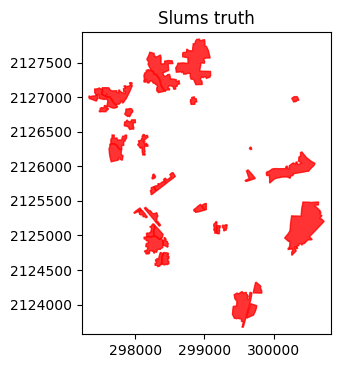

In [6]:
# Python and satsense imports

import matplotlib.pyplot as plt
%matplotlib inline
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# Visualization parameters
RED = '#FF0000'

offset = 100
show_verticies = False
alpha = 0.8

fig = plt.figure(1, dpi=100)
ax = fig.add_subplot(111)

shmp(truth_multi, ax, show_verticies, extent, RED, alpha, 'Slums truth')

plt.show()

### Load the segmentaiton result from the binary mask file

In [7]:
# satsense import
from satsense.util.mask import load_mask_from_file

# data paths and filenames
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Segmentation/'

ext = 'tif'
slum_mask_fname = 'slums_mask' + '.' + ext

result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, slum_mask_fname)

# load the mask
result_slum_mask = load_mask_from_file(result_slum_mask_fullfname)

print("Segmentation result slum was loaded from ", result_slum_mask_fullfname)

Segmentation result slum was loaded from  /home/elena/DynaSlum/Results/Segmentation/slums_mask.tif


### Display the result segmentation binary mask

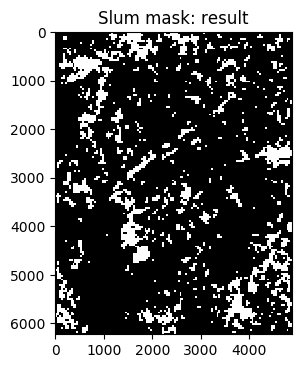

In [8]:
fig = plt.figure(1, dpi=100)
ax = fig.add_subplot(111)

ax.imshow(result_slum_mask,cmap='gray')
ax.set_title('Slum mask: result')

plt.show()

### Convert the mask into a multipolygon

In [13]:
# satsense import
from satsense.util.conversions import mask2multipolygon as m2m

# parameters
#t=(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
#conn4 = 4

# convert 
#multi_result = m2m(result_slum_mask, result_slum_mask, t, conn4);
multi_result = m2m(result_slum_mask, result_slum_mask);

print("The segmentation result was converted to a valid multi-polygon?", multi_result.is_valid)

Ring Self-intersection at or near point 680 1880
Ring Self-intersection at or near point 680 1880


Not a valid polygon!
The segmentation result was converted to a valid multi-polygon? False


### Compute the Jaccard index between the 2 multipolygons